## Subset Selection

In [11]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools

In [12]:
df = pd.read_csv("longley.csv",sep=",")
df.head()

,Unnamed: 0,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
0,1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1,1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
2,1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
3,1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
4,1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


In [13]:
y = df["Employed"]
X = df.drop("Employed",axis=1)
X.head()

,Unnamed: 0,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year
0,1947,83.0,234.289,235.6,159.0,107.608,1947
1,1948,88.5,259.426,232.5,145.6,108.632,1948
2,1949,88.2,258.054,368.2,161.6,109.773,1949
3,1950,89.5,284.599,335.1,165.0,110.929,1950
4,1951,96.2,328.975,209.9,309.9,112.075,1951


In [14]:
X = X.drop(["Year","Unnamed: 0"],axis=1)
X.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population
0,83.0,234.289,235.6,159.0,107.608
1,88.5,259.426,232.5,145.6,108.632
2,88.2,258.054,368.2,161.6,109.773
3,89.5,284.599,335.1,165.0,110.929
4,96.2,328.975,209.9,309.9,112.075


#### Best-Subset Selection 

In multiple regression, accuracy of the model can be drastically reduced due to the multicollinearity. The least square estimates often have low bias and high variance. Literature review shows that appropriate selection of subset may reduce the variance with little sacrifice of bias. Large number of predictors also takes more computational time.  If we select a subset of the predictors then computational time and variance will reduce. However, selection of predictors is very important to the performance of our model. 

Best-Subset selection finds the subset size k∈{0,1,2,…,p} that yields minimum residual sum of squares. Some researchers show that the subset size could be as large as 30 or 40. Size of K is determined by the tradefoff between bias and variance.

Please refer lecture notes for **_algorithm_**


In [15]:
def cal_RSS(Column_name):
    #x = sm.add_constant(X[list(Column_name)])
    model = sm.OLS(y,X[list(Column_name)])
    reg_name = model.fit()
    RSS = ((reg_name.predict(X[list(Column_name)])-y)**2).sum()
    return {"Model_Name":reg_name,"RSS":RSS}

In [16]:
def best_selection(k):
    result=[]
    for combo in itertools.combinations(X.columns, k):
        print(combo)
        result.append(cal_RSS(combo))

    result_df = pd.DataFrame(result)
    print(result_df) 
    best_model = result_df.loc[result_df["RSS"].argmin()]

    return best_model

('GNP.deflator',)
('GNP',)
('Unemployed',)
('Armed.Forces',)
('Population',)
                                          Model_Name          RSS
0  <statsmodels.regression.linear_model.Regressio...   194.776874
1  <statsmodels.regression.linear_model.Regressio...  2502.086304
2  <statsmodels.regression.linear_model.Regressio...  4317.621598
3  <statsmodels.regression.linear_model.Regressio...  3670.577671
4  <statsmodels.regression.linear_model.Regressio...    18.050954
('GNP.deflator', 'GNP')
('GNP.deflator', 'Unemployed')
('GNP.deflator', 'Armed.Forces')
('GNP.deflator', 'Population')
('GNP', 'Unemployed')
('GNP', 'Armed.Forces')
('GNP', 'Population')
('Unemployed', 'Armed.Forces')
('Unemployed', 'Population')
('Armed.Forces', 'Population')
                                          Model_Name          RSS
0  <statsmodels.regression.linear_model.Regressio...    32.003374
1  <statsmodels.regression.linear_model.Regressio...   160.311179
2  <statsmodels.regression.linear_model.Regressio..

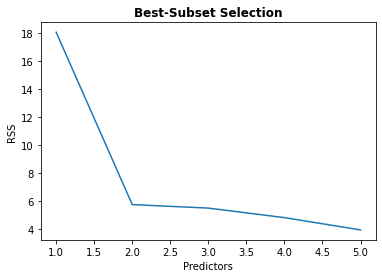

In [17]:
no_columns=len(X.columns)
best_model = pd.DataFrame(columns=["Model_Name","RSS"])
for i in range(1,no_columns+1):
    best_model.loc[i] = best_selection(i)

plt.plot(best_model["RSS"])  
plt.xlabel("Predictors")
plt.ylabel("RSS")  
plt.title("Best-Subset Selection",fontweight="bold")
plt.show()
    

In [18]:
best_model.loc[4,"Model_Name"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Employed   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.255e+04
Date:                Thu, 01 Oct 2020   Prob (F-statistic):                    8.59e-25
Time:                        16:42:44   Log-Likelihood:                         -13.113
No. Observations:                  16   AIC:                                      34.23
Df Residuals:                      12   BIC:                                      37.32
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
GNP.deflator     0.0667      0.046      1.445      0.174      -0.034       0.167
Unemployed      -0.0143      0.003     -4.886      0.000      -0.021      -0.008
Armed.Forces    -0.0048      0.004     -1.300      0.218      -0.013       0.003
Population       0.5479      0.031     17.470      0.000       0.480       0.616
==============================================================================
Omnibus:                        4.848   Durbin-Watson:                   0.686
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                2.397
Skew:                          -0.435   Prob(JB):                        0.302
Kurtosis:                       4.685   Cond. No.                         155.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:**

The above plot shows that all five predictors gives lowest RSS value. On of the drawback of Best-Subset Selection is the computational time that alogirthm takes to find the best-subset increases with the increase of number of predictors.

#### References: 

1. Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani. (2013). An introduction to statistical learning : with applications in R. New York :Springer